In [1]:
import pandas as pd
import os
from os import walk
from datetime import datetime,timedelta
import matplotlib.pyplot as plt
import numpy as np

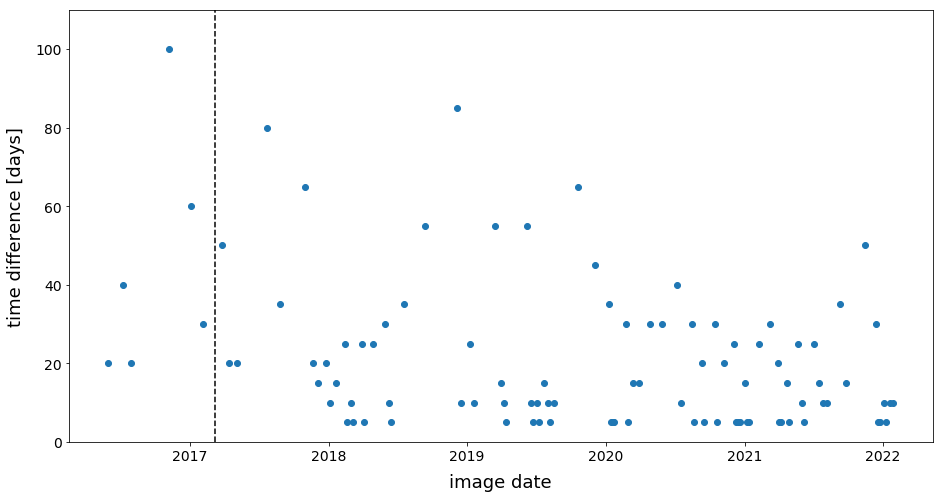

In [17]:
path='C:/Users/micha/OneDrive - MMU/PhD Manchester/Glacier_velocimetry/Veniaminof/Mount_Veniaminof_orbit_num_29_run_7/image_series'


f=[]
dates=[]
date_str = []
dates =[]
time_diff_days=[]

for item in walk(path):
    f.extend(item)

filenames_list=f[2]

for filename in filenames_list:
    item=filename.split('.')[0]
    date_str.append(item)

for item in date_str:
    dates.append(datetime.strptime(item,'%Y%m%d'))

time_diff_delta = np.diff(dates)

for item in time_diff_delta:
    time_diff_days.append(item.days)

time_diff_days.insert(0,float('nan'))

#image_series = pd.DataFrame(dates)
#image_series.rename(columns={0 :'acquisition date'}, inplace=True)

# optional split dates in years, months and days 
#def years(date):
#    return date.year

#def months(date):
#    return date.month

#def days(date):
#    return date.day

#image_series['year']=image_series['timestamp'].map(years)
#image_series['month']=image_series['timestamp'].map(months)
#image_series['day']=image_series['timestamp'].map(days)


#print(image_series)
#len(dates)

#print(time_diff_delta)
#len(time_diff_days)

# launch of Sentinel-2B
launch_date = '20170307'
launch_date = datetime.strptime(launch_date,'%Y%m%d')


fig=plt.figure()
ax = fig.add_axes([0.1,0.1,2,1.5])
ax.set_xlabel('image date',fontsize=18,labelpad=10)
plt.xticks(fontsize=14)
ax.set_ylabel('time difference [days]',fontsize=18,labelpad=10)
plt.yticks(fontsize=14)
ax.plot(dates,time_diff_days,linestyle='None',marker='o')
plt.ylim((0,110))

plt.vlines(launch_date,0,110,linestyles='dashed')

plt.show()


# write excel 
#file = 'sat_image_series.xlsx'
#path_out=os.path.join(path,file)
#image_series.to_excel(path_out, sheet_name='sheet1', index=False)


TypeError: float() argument must be a string or a number, not 'datetime.timedelta'

         date_1     date_2 difference  difference_time64
35   2016-05-09 2016-07-08    60 days          5184000.0
104  2016-05-09 2016-07-28    80 days          6912000.0
195  2016-05-09 2016-11-05   180 days         15552000.0
291  2016-05-09 2017-01-04   240 days         20736000.0
386  2016-05-09 2017-02-03   270 days         23328000.0
480  2016-05-09 2017-03-25   320 days         27648000.0
573  2016-05-09 2017-04-14   340 days         29376000.0
663  2016-05-09 2017-05-04   360 days         31104000.0
0    2016-05-29 2016-07-08    40 days          3456000.0
36   2016-05-29 2016-07-28    60 days          5184000.0
105  2016-05-29 2016-11-05   160 days         13824000.0
196  2016-05-29 2017-01-04   220 days         19008000.0
292  2016-05-29 2017-02-03   250 days         21600000.0
387  2016-05-29 2017-03-25   300 days         25920000.0
481  2016-05-29 2017-04-14   320 days         27648000.0
574  2016-05-29 2017-05-04   340 days         29376000.0
37   2016-07-08 2016-11-05   12

Timedelta('188 days 20:55:31.548757')

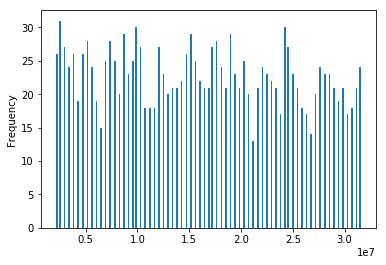

In [18]:
#satellite image pairs time differences

path = 'C:/Users/micha/OneDrive - MMU/PhD Manchester/Glacier_velocimetry/Veniaminof/Mount_Veniaminof_orbit_num_29_run_7/image_pairs'
file_1 = 'first_date.txt'
file_2 = 'second_date.txt'

pd.set_option('display.max_rows', None)

path_join_1=os.path.join(path,file_1)
first_date=pd.read_csv(path_join_1,names=['date_1'],header=None).astype('str')

first_date_str = []
second_date_str = []

for item in first_date['date_1']:
    first_date_str.append(datetime.strptime(item,'%Y%m%d'))

#first_date_str.sort_values(by=['date'])

path_join_2=os.path.join(path,file_2)
second_date=pd.read_csv(path_join_2,names=['date_2'],header=None).astype('str')

for item in second_date['date_2']:
    second_date_str.append(datetime.strptime(item,'%Y%m%d'))



#second_date_str.sort_values(by=['date'])

#print(first_date_str)
#comb = pd.concat([first_date_str,second_date_str],axis=1)


difference =[]

zip_object = zip(second_date_str,first_date_str)

for second_date_str_i, first_date_str_i in zip_object:
    difference.append(second_date_str_i-first_date_str_i)


first_date_str_data_frame = pd.DataFrame(first_date_str,columns=['date_1'])
second_date_str_data_frame = pd.DataFrame(second_date_str,columns=['date_2'])
difference_data_frame = pd.DataFrame(difference,columns=['difference'])
comb = pd.concat([first_date_str_data_frame,second_date_str_data_frame,difference_data_frame],axis=1)

comb = comb.sort_values(by=['date_1','difference'])
comb['difference_time64'] = comb['difference'].astype('timedelta64[s]')
#print(first_date_str)

print(comb)
#type(comb['difference'][1])
comb['difference_time64'].plot.hist(bins=200)
comb['difference'].mean()
#print(test)
#len(comb)